# Logistic Regression Demonstration
This notebook demonstrates logistic regression on:
1. **Binary Classification** -- Synthetic data with 2 classes
2. **Multiclass Classification** -- Synthetic data with 3 classes

We will evaluate model performance, visualize decision boundaries, and explore the impact of hyperparameters on performance.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

## Binary Classification
Here, we generate synthetic data and apply logistic regression to perform binary classification. We'll visualize the decision boundary and evaluate the model using accuracy and a classification report.

In [2]:
# Generate synthetic binary classification data
np.random.seed(0)
num_samples = 500
X = np.random.randn(num_samples, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary target based on sum of features

In [3]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
# Initialize logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train);

In [5]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [6]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

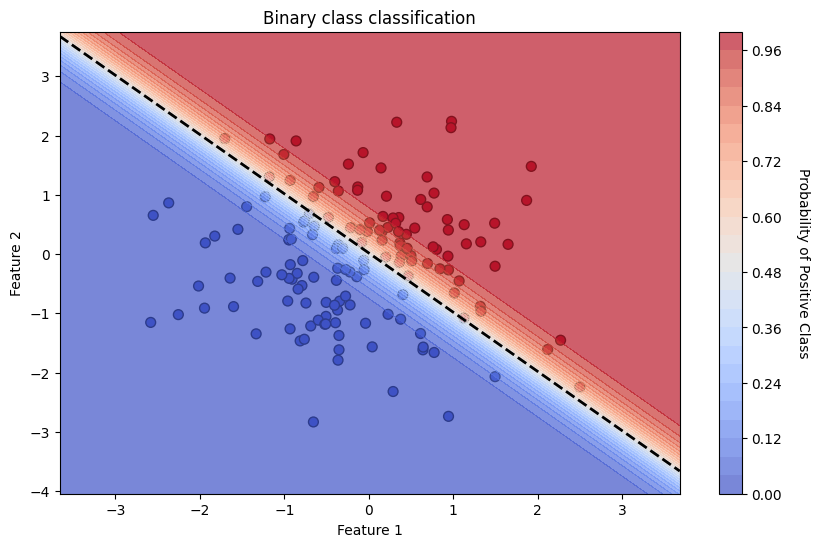

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", edgecolor="k", s=50, label="Actual Classes")

# Generate a finer mesh grid for a smoother decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))  

# Predict probability scores for each grid point and reshape for contour plot
Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Probability for positive class
Z_prob = Z_prob.reshape(xx.shape)

# Plot the probability gradient as a filled contour for decision boundary
contour = plt.contourf(xx, yy, Z_prob, levels=30, alpha=0.7, cmap="coolwarm") 

# Plot the actual decision boundary line where probability is 0.5
plt.contour(xx, yy, Z_prob, levels=[0.5], colors="black", linewidths=2, linestyles="--")

# Add color bar to show the probability gradient
cbar = plt.colorbar(contour)
cbar.set_label("Probability of Positive Class", rotation=270, labelpad=20)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary class classification");


## Multiclass Classification
Next, we apply logistic regression to the Iris dataset, which contains three classes. We use two features for visualization purposes and evaluate the model's accuracy and decision boundaries.

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [9]:
# Create an artificial dataset with 3 classes and 2 features
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=0)

In [10]:
# Split the artificial data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Initialize and train logistic regression model on the artificial dataset
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [12]:
# Evaluate model on the artificial dataset
report = classification_report(y_test, y_pred)

# Display classification report and accuracy
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        55
           1       0.75      0.76      0.76        51
           2       0.93      0.84      0.88        44

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



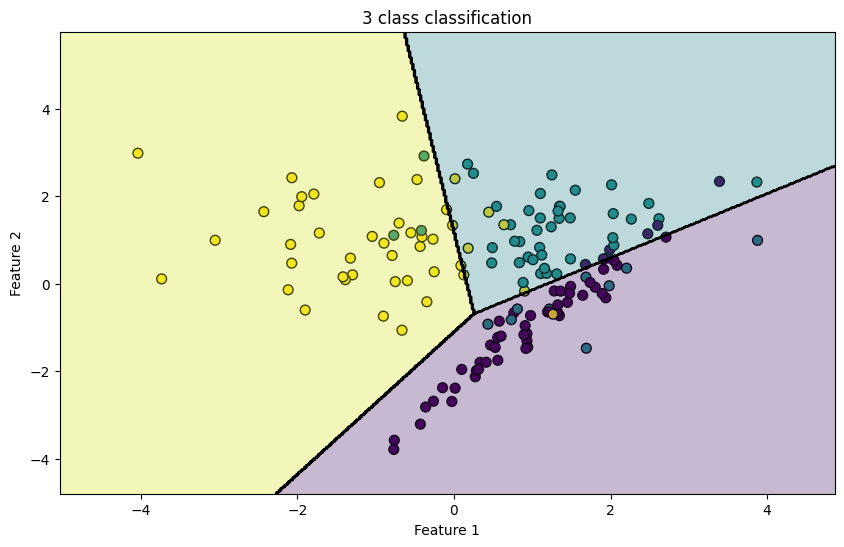

In [13]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual test points (colored by class)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis", edgecolor="k", s=50, label="Actual Classes")

# Generate a fine mesh grid for a smooth decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict class probabilities for each grid point and find the most probable class
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary with class regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")  # Use a single color map for all classes

# Plot decision boundaries as solid lines between classes
plt.contour(xx, yy, Z, colors="black", linewidths=1.5)

# Labels, title, and legend for improved readability
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("3 class classification");



## Hyperparameter tuning

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for C and penalty types
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Set up GridSearchCV with multiple penalties
# 'saga' = Stochastic Gradient Descent: 
# gradient is computed for a single random data point in each iteration rather than the entire dataset
grid_search = GridSearchCV(LogisticRegression(solver='saga', max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate and display results
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Best parameters: {grid_search.best_params_}")
print(classification_report(y_test, y_pred))

Best parameters: {'C': 1, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        55
           1       0.75      0.76      0.76        51
           2       0.93      0.84      0.88        44

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

